In [321]:
import numpy as np
import matplotlib.pyplot as plt

In [322]:
xmin = -9
xmax = 9
dx = 0.1

ymin = -12
ymax = 12
dy = 0.1

In [323]:
# x_coords and y_coords cell centered
x_coords = np.arange(xmin + dx/2, xmax + dx/2, dx)
y_coords = np.arange(ymax - dy/2, ymin - dy/2, -dy)

In [324]:
xx, yy = np.meshgrid(x_coords, y_coords, indexing='xy')

In [325]:
r = 1.8288

inside_circle = np.square(xx) + np.square(yy) <= np.square(r)
inside_circle

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [326]:
xx

array([[-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       ...,
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95]])

In [327]:
yy

array([[ 11.95,  11.95,  11.95, ...,  11.95,  11.95,  11.95],
       [ 11.85,  11.85,  11.85, ...,  11.85,  11.85,  11.85],
       [ 11.75,  11.75,  11.75, ...,  11.75,  11.75,  11.75],
       ...,
       [-11.75, -11.75, -11.75, ..., -11.75, -11.75, -11.75],
       [-11.85, -11.85, -11.85, ..., -11.85, -11.85, -11.85],
       [-11.95, -11.95, -11.95, ..., -11.95, -11.95, -11.95]])

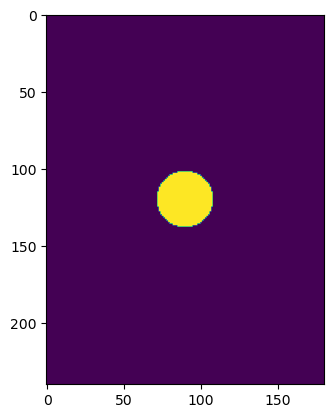

In [328]:
plt.imshow(inside_circle)

In [329]:
control_mass =  0.5

treatment_mass = 1.27

In [330]:
inside_circle.shape, 1

((240, 180), 1)

In [331]:
np.ones(inside_circle.shape) 

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

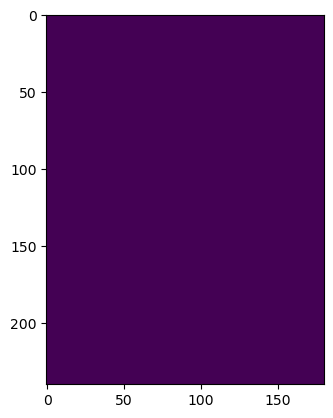

In [332]:
NY = inside_circle.shape[0]
NX = inside_circle.shape[1]
plt.imshow(np.ones((NY, NX,1)))

In [333]:
ControlMass = 0.5  # kg/m^3

control_array = np.ones((NY, NX)) * ControlMass
control_array *= ~inside_circle
control_array

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [334]:
TreatmentMass = 1.27

# for 2d, we will need a 3d array
treatment_array = np.ones((NY,NX)) * TreatmentMass
#np.concatenate((inside_circle, np.ones((NY))))
treatment_array *= inside_circle
treatment_array


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

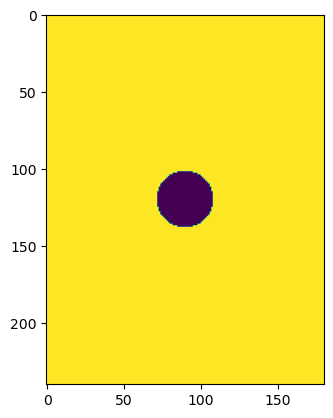

In [335]:
plt.imshow(control_array)

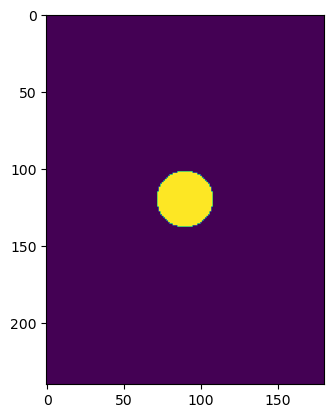

In [336]:
plt.imshow(treatment_array)


In [337]:
control_array.shape

(240, 180)

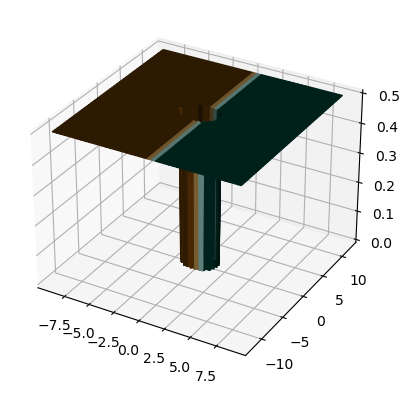

In [338]:
# 3d representations of xx and yy
xxz = np.zeros((xx.shape[0], xx.shape[1], 1))
yyz = np.zeros((yy.shape[0], yy.shape[1], 1))

data = np.concatenate((xx, yy))

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(xx, yy, control_array, facecolors=plt.cm.BrBG(data))

In [339]:
control_array

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

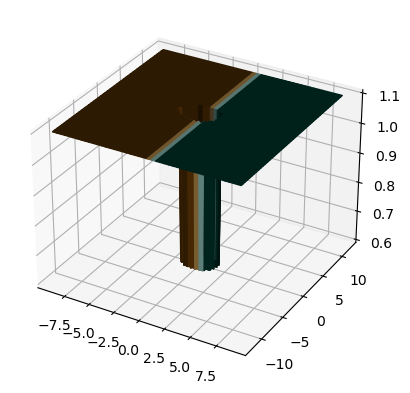

In [340]:
ControlHeight = 0.6  # m
TreatmentHeight = 0.15  # m

# 3d representations of control and treatment arrays
control_array_3d = np.zeros((NY, NX, 1))
# copy control array into x and y dimensions of 3d array
control_array_3d[:, :, 0] = control_array
# add control height in z dimension
control_array_3d[:, :, 0] += ControlHeight

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(xx, yy, control_array_3d[:,:,0], facecolors=plt.cm.BrBG(data))

# treatment_array_3d = np.zeros((NY, NX, 1))
# # copy treatment array into x and y dimensions of 3d array
# treatment_array_3d[:, :, 0] = treatment_array

# exporting as csv
# import csv
# import numpy as np
# fil_name = 'file'
# with open(fil_name+'.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile, delimiter=',')
#     writer.writerows(control_array_3d)

In [348]:
i = 0
while i < 1:
    for row in control_array_3d:
        print(row)
        i += 1

[[1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 ...
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]]
[[1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 ...
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]]
[[1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 ...
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]]
[[1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 ...
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]]
[[1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 ...
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0.  0.  ... 0.  0.  0. ]]
[[1.1 0.  0.  ... 0.  0.  0. ]
 [1.1 0. 

In [341]:
Radius = 1.8288  # m

# x_coords and y_coords cell centered
x_coords = np.arange(xmin + dx/2, xmax + dx/2, dx)
y_coords = np.arange(ymax - dy/2, ymin - dy/2, -dy)

xx, yy = np.meshgrid(x_coords, y_coords, indexing='xy')

# TODO: we need this as a 3D array (?)
inside_circle = np.square(xx) + np.square(yy) <= np.square(Radius)

NY = inside_circle.shape[0]
NX = inside_circle.shape[1]
# make a 3D array (NY, NX, 1)
control_array = np.ones((NY, NX, 1)) * ControlMass
control_array[:, :, 0] *= ~inside_circle

treatment_array = np.ones((NY, NX, 1)) * TreatmentMass
treatment_array[:, :, 0] *= inside_circle


In [342]:
treatment_array.shape == control_array.shape

True

In [351]:
control_array

array([[[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       ...,

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]],

       [[0.5],
        [0.5],
        [0.5],
        ...,
        [0.5],
        [0.5],
        [0.5]]])